In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12], 'Sales': [5384,8081,10282,9156,6118,9139,12460,10717,7825,9693,15177,10990]}
df = pd.DataFrame(data=data)
df.head()

,Month,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118


In [3]:
NMA_3 = []
k=3
for t in range(0, 16):
    NMA_3.append(np.round(sum(df.iloc[t-k:t, 1])/k, 1))

s = pd.Series(NMA_3, name='NMA_3')
df = pd.concat([df, s], axis=1 ,sort=False)
df

,Month,Sales,NMA_3
0,1.0,5384.0,0.0
1,2.0,8081.0,0.0
2,3.0,10282.0,0.0
3,4.0,9156.0,7915.7
4,5.0,6118.0,9173.0
5,6.0,9139.0,8518.7
6,7.0,12460.0,8137.7
7,8.0,10717.0,9239.0
8,9.0,7825.0,10772.0
9,10.0,9693.0,10334.0


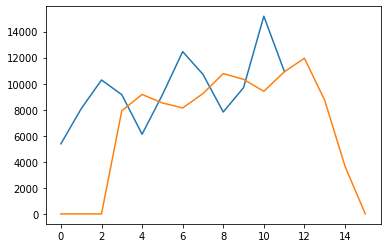

In [4]:
plt.figure()
plt.plot(df['Sales'], label='data')
plt.plot(df['NMA_3'], label='NMA 3 Months')


## Questions about moving average
How do you use to predict further months when only looking at past 3 months? No data to go off?
I am only really predicting one month into the future, are we meant to use the predicitons as data points?
I cant find in lecture slides or online how to do this.

## exponential smoothing

In [33]:
data = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12], 'Sales': [5384,8081,10282,9156,6118,9139,12460,10717,7825,9693,15177,10990]}
df2 = pd.DataFrame(data=data)
df2.head()

,Month,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118


In [34]:
Alpha = [0.2, 0.8]

#Predict+1 = Alpha*Actual + (1-alpha)*predict

for A in Alpha:
    ES = [np.nan]
    col = "{}ES".format(A)    
    
    for i in range(1, df2.shape[0]+1):
        if np.isnan(ES[i-1]):
            predict = A*df2.iloc[i-1][1]
        else:
            predict = A*df2.iloc[i-1][1] + (1-A)*ES[i-1]
        ES.append(round(predict,1))
    s = pd.Series(ES, name=col)
    df2 = pd.concat([df2, s], axis=1, sort=False)
        

In [35]:
df2

,Month,Sales,0.2ES,0.8ES
0,1.0,5384.0,NaN,NaN
1,2.0,8081.0,1076.8,4307.2
2,3.0,10282.0,2477.6,7326.2
3,4.0,9156.0,4038.5,9690.8
4,5.0,6118.0,5062.0,9263.0
5,6.0,9139.0,5273.2,6747.0
6,7.0,12460.0,6046.4,8660.6
7,8.0,10717.0,7329.1,11700.1
8,9.0,7825.0,8006.7,10913.6
9,10.0,9693.0,7970.4,8442.7


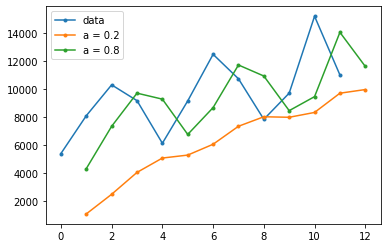

In [40]:
plt.figure()
plt.plot(df2['Sales'], label='data', marker=".")
plt.plot(df2['0.2ES'], label='a = 0.2', marker=".")
plt.plot(df2['0.8ES'], label='a = 0.8', marker=".")
plt.legend(loc='best')